## Visualizing meta-learning datasets
Showcases the meta-train/val/test datasets and h

In [1]:
import os
import torch
import torch.nn.functional as F
from torchvision.transforms import transforms
import numpy as np

from torchmeta.datasets.helpers import quickdraw
from torchmeta.datasets import QuickDraw
from torchmeta.utils.data import BatchMetaDataLoader
from torchmeta.transforms import Categorical
from torchvision.utils import make_grid
from matplotlib import pyplot as plt

In [2]:
class CategoricalAndLabels(Categorical):
    def __call__(self, target):
        label, class_augmentation = target
        return (self.classes[target], label)

In [3]:
train_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,),(0.3081,))])

In [4]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [5]:
train_dataset = quickdraw(folder='/storage/smb79ck2/ndata',
                    shots=1,
                    ways=5,
                    shuffle=True,
                    test_shots=1,
                    meta_train=True,
                    download=False,
                    transform=train_transform)
print(len(train_dataset))

2957649120


In [6]:
train_dataloader = BatchMetaDataLoader(train_dataset,
                                 batch_size=1,
                                 shuffle=True,
                                 num_workers=1)
print(len(train_dataloader))

2957649120


In [7]:
num_batch = 0
for batch in train_dataloader:
    if num_batch == 0:
        train_inputs, train_targets = batch["train"]
        print('Train inputs shape: {0}'.format(train_inputs.shape))    # (1, 5, 1, 28, 28)
        print('Train targets shape: {0}'.format(train_targets.shape))  # (1, 5)
        print(train_targets)

        test_inputs, test_targets = batch["test"]
        print('Test inputs shape: {0}'.format(test_inputs.shape))      # (1, 5, 1, 28, 28)
        print('Test targets shape: {0}'.format(test_targets.shape))    # (1, 5)
        num_batch += 1
    else:
        break

Train inputs shape: torch.Size([1, 5, 1, 28, 28])
Train targets shape: torch.Size([1, 5])
tensor([[0, 1, 3, 4, 2]])
Test inputs shape: torch.Size([1, 5, 1, 28, 28])
Test targets shape: torch.Size([1, 5])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


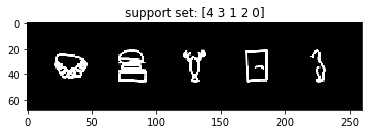

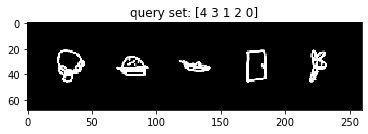

In [8]:
for task_id, (train_inputs, train_targets, test_inputs, test_targets) in enumerate(zip(*batch['train'], *batch['test'])):
    plt.figure(1)
    plt.title('support set: ' + str(train_targets.numpy()))
    show(make_grid(train_inputs, padding=20))
    plt.figure(2)
    plt.title('query set: ' + str(test_targets.numpy()))
    show(make_grid(test_inputs, padding=20))

In [9]:
val_dataset = quickdraw(folder='/storage/smb79ck2/ndata',
                    shots=1,
                    ways=5,
                    shuffle=True,
                    test_shots=1,
                    meta_val=True,
                    download=False,
                    transform=train_transform)
print(len(val_dataset))

10735296


In [10]:
val_dataloader = BatchMetaDataLoader(val_dataset,
                                 batch_size=1,
                                 shuffle=True,
                                 num_workers=1)
print(len(val_dataloader))

10735296


In [11]:
num_batch = 0
for batch in val_dataloader:
    if num_batch == 0:
        train_inputs, train_targets = batch["train"]
        print('Train inputs shape: {0}'.format(train_inputs.shape))    # (1, 5, 1, 28, 28)
        print('Train targets shape: {0}'.format(train_targets.shape))  # (1, 5)

        test_inputs, test_targets = batch["test"]
        print('Test inputs shape: {0}'.format(test_inputs.shape))      # (1, 5, 1, 28, 28)
        print('Test targets shape: {0}'.format(test_targets.shape))    # (1, 5)
        num_batch += 1
    else:
        break

Train inputs shape: torch.Size([1, 5, 1, 28, 28])
Train targets shape: torch.Size([1, 5])
Test inputs shape: torch.Size([1, 5, 1, 28, 28])
Test targets shape: torch.Size([1, 5])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


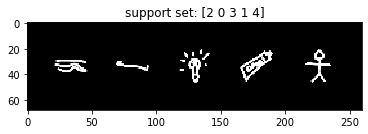

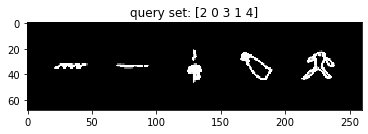

In [12]:
for task_id, (train_inputs, train_targets, test_inputs, test_targets) in enumerate(zip(*batch['train'], *batch['test'])):
    plt.figure(1)
    plt.title('support set: ' + str(train_targets.numpy()))
    show(make_grid(train_inputs, padding=20))
    plt.figure(2)
    plt.title('query set: ' + str(test_targets.numpy()))
    show(make_grid(test_inputs, padding=20))

In [13]:
test_dataset = quickdraw(folder='/storage/smb79ck2/ndata',
                    shots=1,
                    ways=5,
                    shuffle=True,
                    test_shots=1,
                    meta_test=True,
                    download=False,
                    transform=train_transform)
print(len(test_dataset))

10735296


In [14]:
test_dataloader = BatchMetaDataLoader(test_dataset,
                                 batch_size=2,
                                 shuffle=True,
                                 num_workers=1)
print(len(test_dataloader))

5367648


In [15]:
num_batch = 0
for batch in test_dataloader:
    if num_batch == 0:
        train_inputs, train_targets = batch["train"]
        print('Train inputs shape: {0}'.format(train_inputs.shape))    # (1, 5, 1, 28, 28)
        print('Train targets shape: {0}'.format(train_targets.shape))  # (1, 5)

        test_inputs, test_targets = batch["test"]
        print('Test inputs shape: {0}'.format(test_inputs.shape))      # (1, 5, 1, 28, 28)
        print('Test targets shape: {0}'.format(test_targets.shape))    # (1, 5)
        num_batch += 1
    else:
        break

Train inputs shape: torch.Size([2, 5, 1, 28, 28])
Train targets shape: torch.Size([2, 5])
Test inputs shape: torch.Size([2, 5, 1, 28, 28])
Test targets shape: torch.Size([2, 5])


In [16]:
batch['train'][0].shape

torch.Size([2, 5, 1, 28, 28])

In [17]:
%matplotlib inline
def show(img, fig):
    npimg = img.numpy()
    fig.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


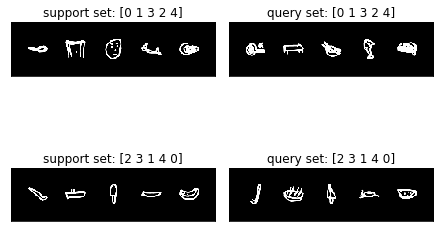

In [18]:
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True) #, figsize=(5, 20))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
i = 0

for task_id, (train_inputs, train_targets, test_inputs, test_targets) in enumerate(zip(*batch['train'], *batch['test'])):
    f_ax1 = fig.add_subplot(spec[i, 0], xticks=[], yticks=[])
    f_ax1.set_title('support set: ' + str(train_targets.numpy()))
    f_ax2 = fig.add_subplot(spec[i, 1], xticks=[], yticks=[])
    f_ax2.set_title('query set: ' + str(test_targets.numpy()))

    show(make_grid(train_inputs, padding=20), f_ax1)
    show(make_grid(test_inputs, padding=20), f_ax2)

    i += 1